In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [4]:
print("Data Shape:\n", df.shape, "\n")
print("Data Types:\n", df.dtypes, "\n")
print("Null count:\n", df.isnull().sum(), "\n")
print("Data Info:\n", df.info)

Data Shape:
 (205, 26) 

Data Types:
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object 

Null count:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelba

In [5]:
df = df.drop(['car_ID'],axis=1)

In [6]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Handling duplicate values in car name

* nissan and Nissan are same

* toyota and toyouta are same

* vokswagen , volkswagen and vw are same

* mazda and maxda are same

* porcshce and porsche are same

In [7]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
#df['symboling'] = df['symboling'].astype('str')
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [9]:
cat_col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [10]:
num_col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Visualization

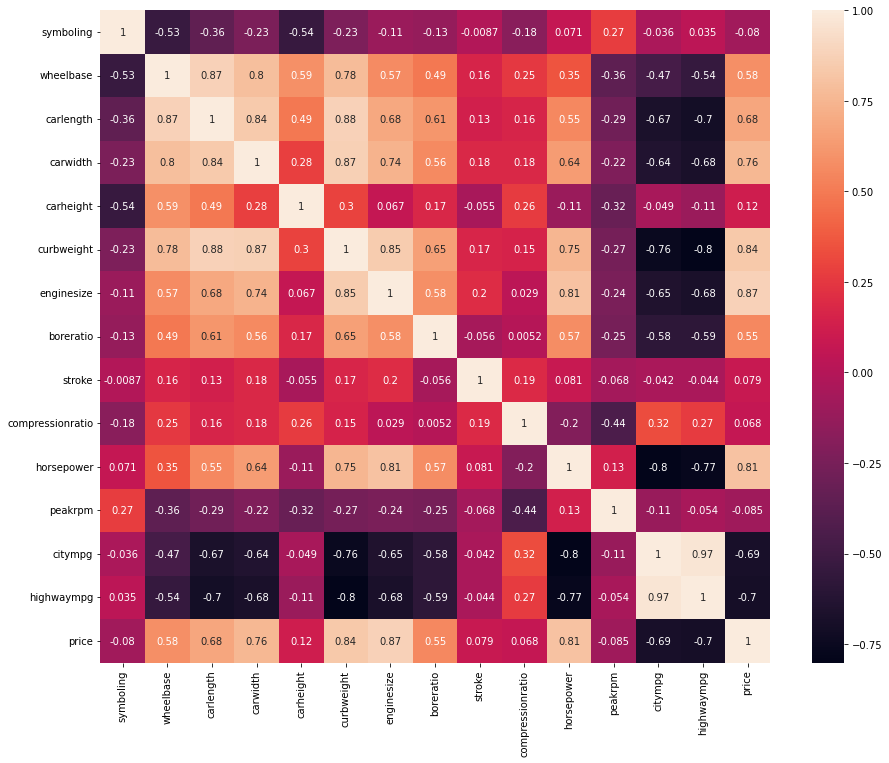

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

* wheelbase has a high positive correlation with carlength,carwidth and curbweight
* carlength has a high positive correlation with curbweight
* carlength has a negative correlation with highwaympg
* carwidth has a high positive correlation with curbweight and engine size
* enginesize has a high positive correlation with horsepower
* curbweight has a high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has a negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated
* engine size and horse power is highly related wth the price

### Visualization of Categroical Values 

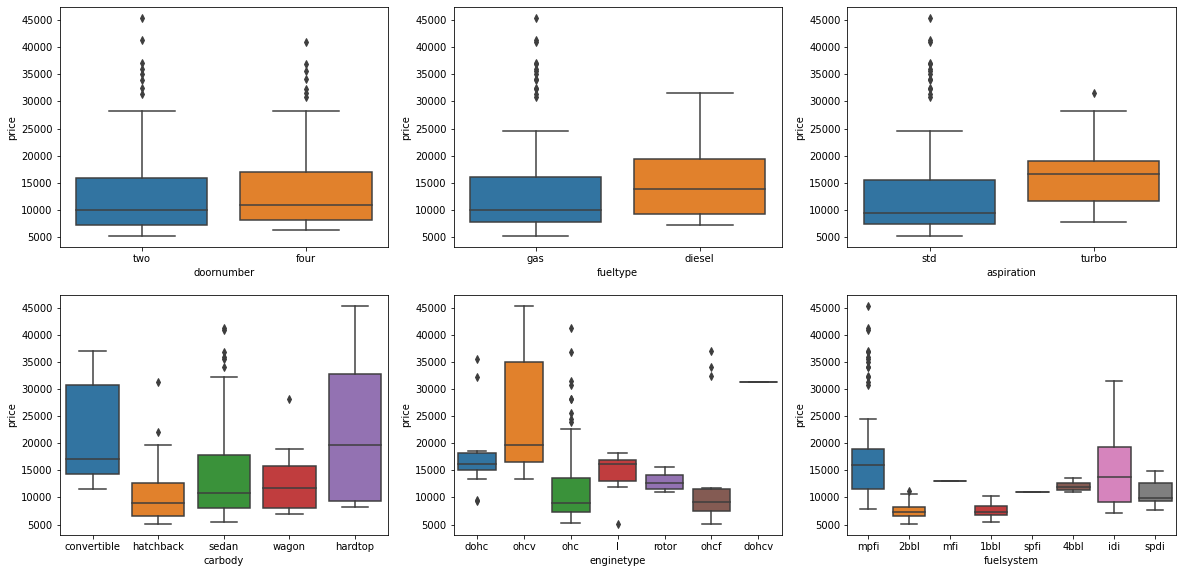

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

* Diesel cars are more expensive than petrol cars.
* All the types of car bodies are relatively cheaper as compared to convertible car bodies.
* Cars with rear engine locations are way more expensive than cars with front engine locations.
* The price of the car is directly proportional to the number of cylinders in most cases.
* DoorNumber isn't affecting the price much.

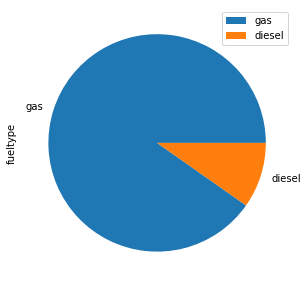

In [13]:
df_v=pd.DataFrame(df['fueltype'].value_counts())
plot = df_v.plot.pie(y='fueltype', figsize=(5, 5))

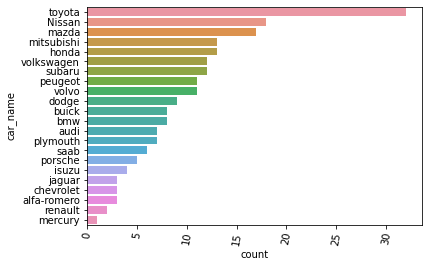

In [14]:
df_v=pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})
plot = sns.barplot(y='car_name',x='count',data=df_v)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

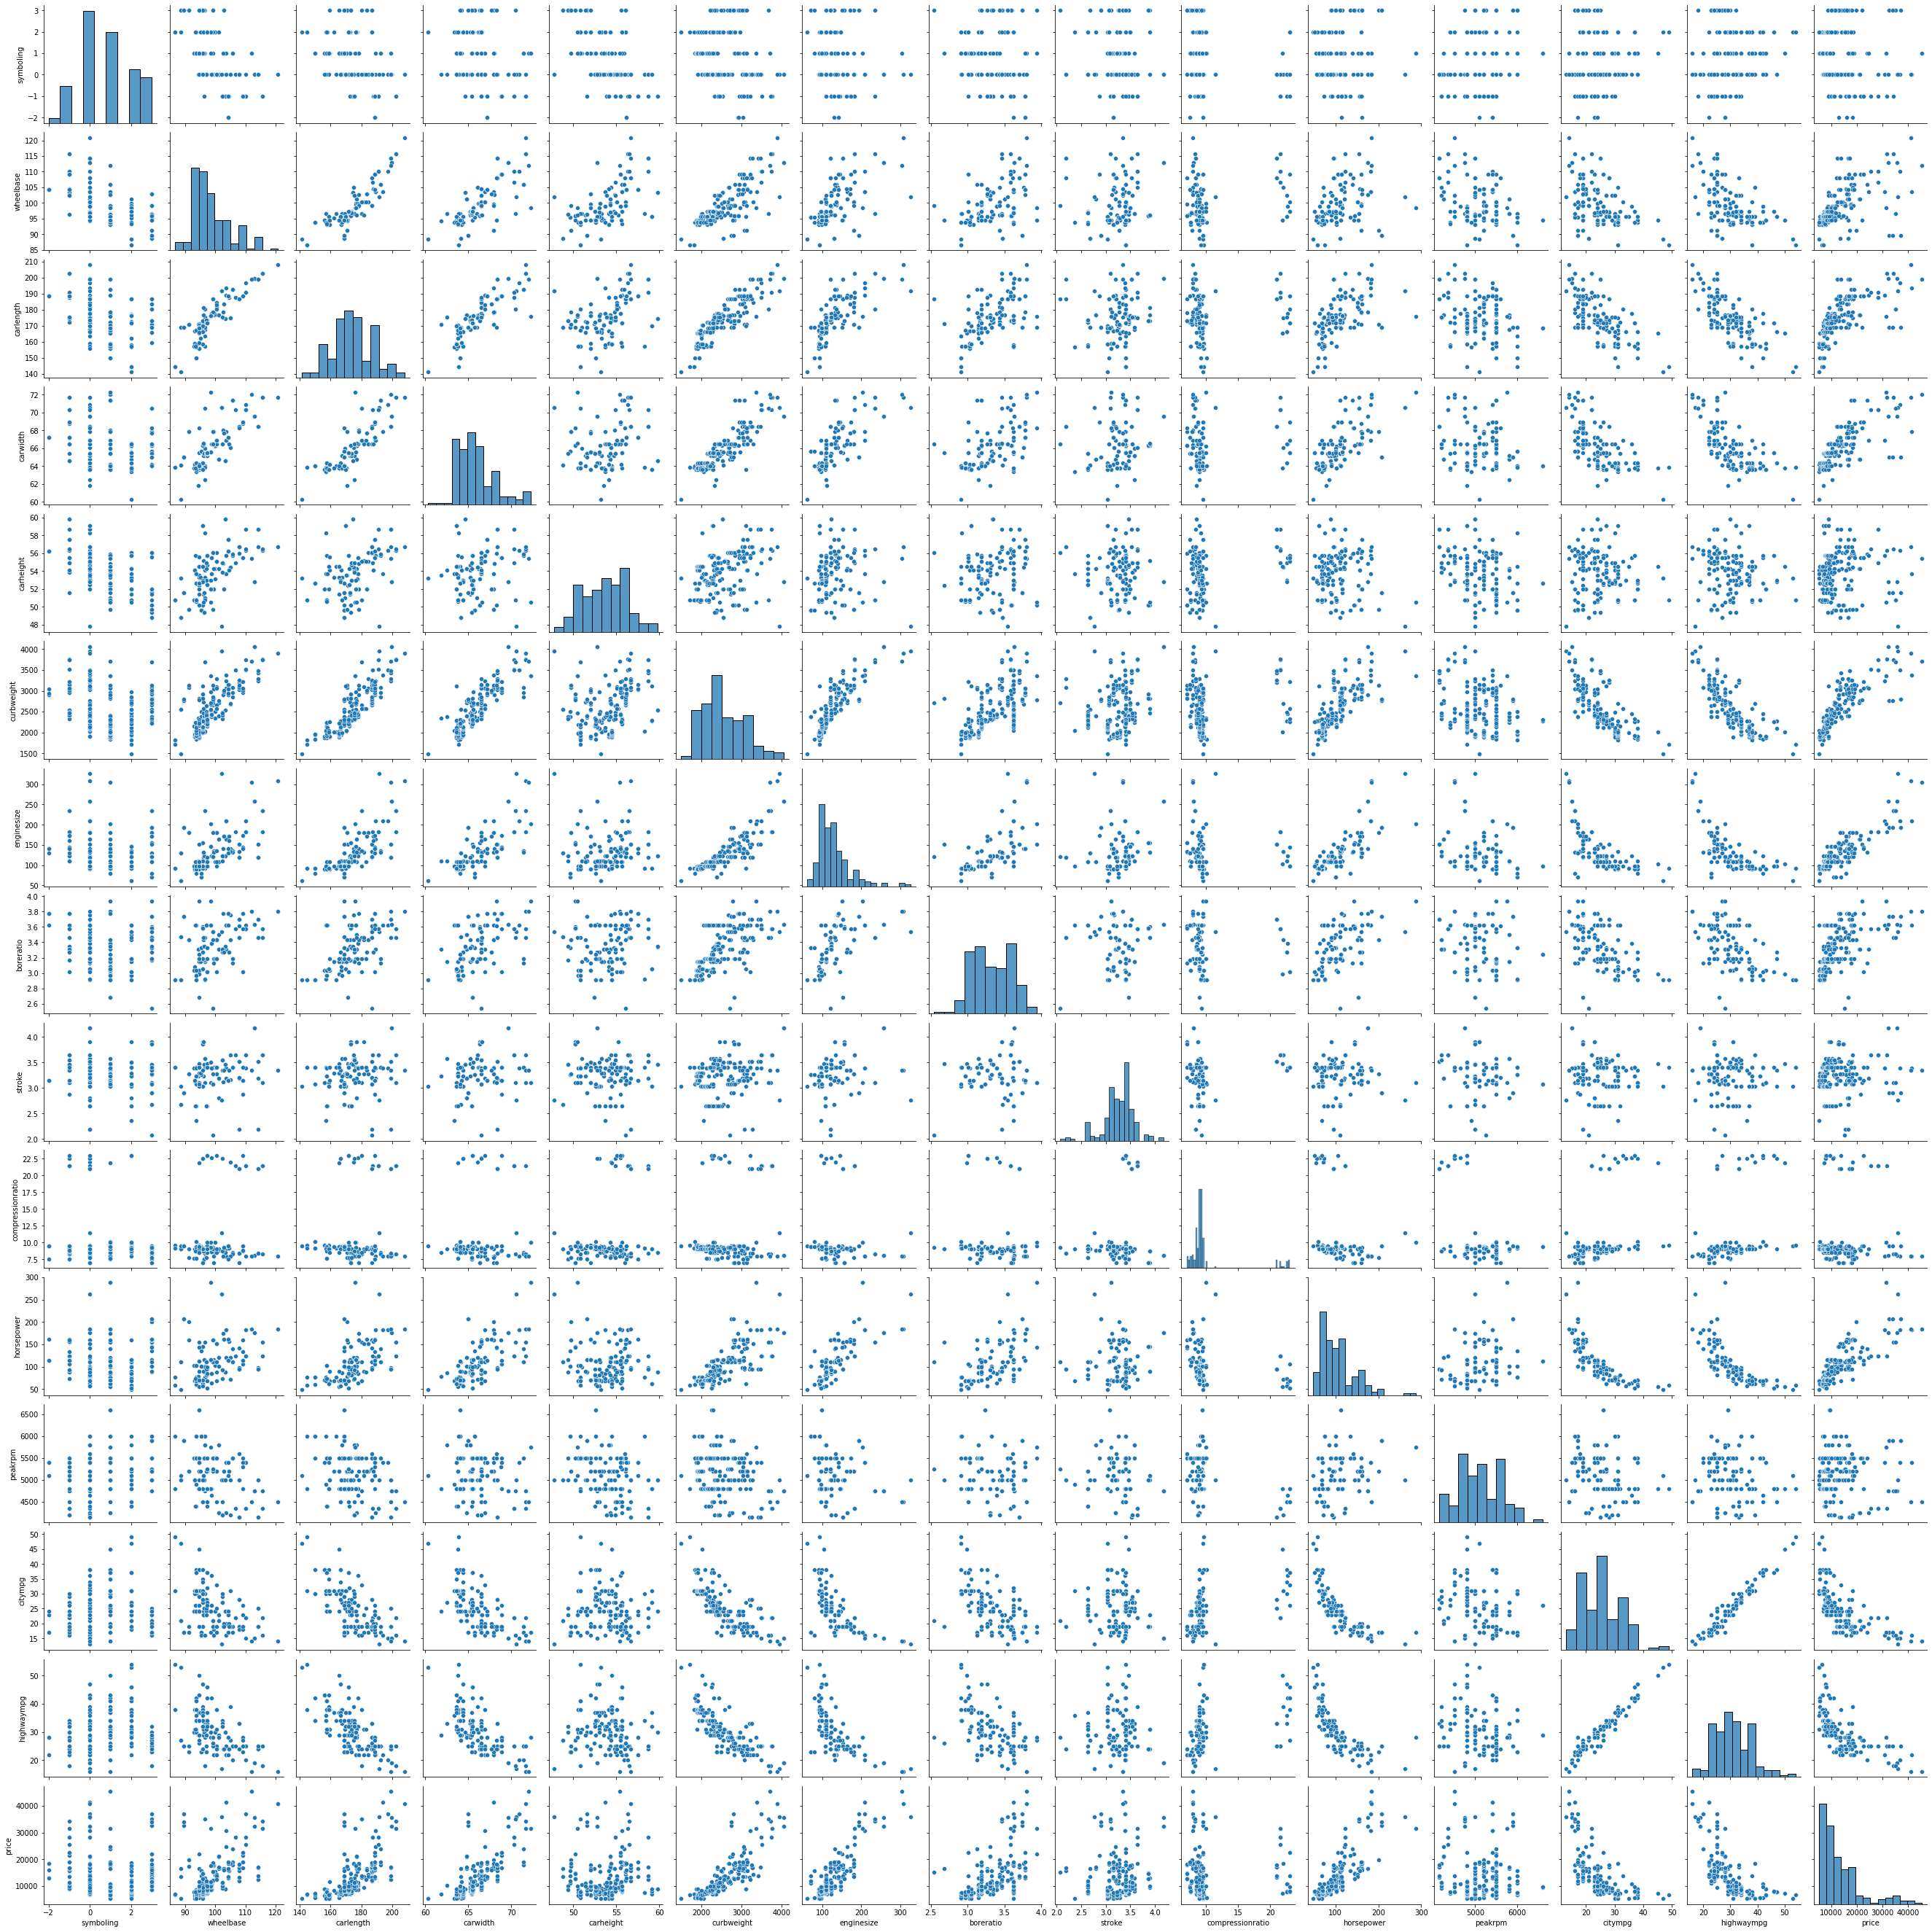

In [15]:
ax = sns.pairplot(df[num_col])

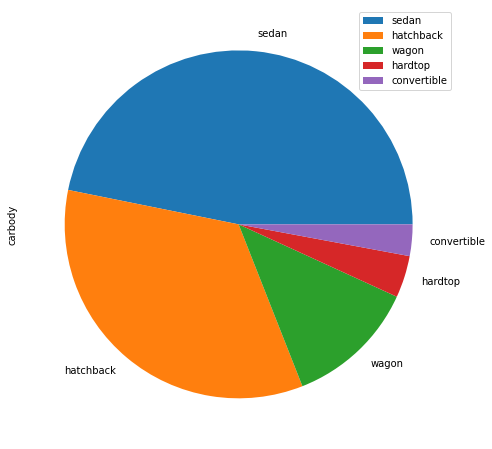

In [16]:
df_v=pd.DataFrame(df['carbody'].value_counts())
plot = df_v.plot.pie(y='carbody', figsize=(8, 8));

## Horse Power vs Price

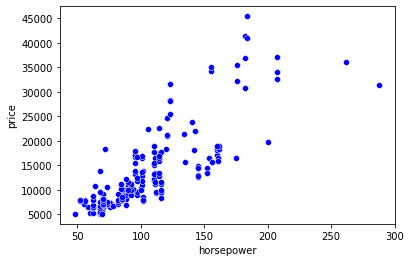

In [17]:
sns.scatterplot(x="horsepower", y="price", data=df,color='b');

In [18]:
X = df.drop(['price'],axis=1)
y = df['price']

# Now we are using Get dummies to solve the issue of object data 
X = pd.get_dummies(X)
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# Split data into training data and test data 

from sklearn.model_selection import train_test_split

### Split the data as train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [21]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
120,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,...,0,0,0,1,0,0,0,0,0,0
154,0,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,9.0,...,0,0,0,1,0,0,0,0,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
79,1,93.0,157.3,63.8,50.8,2145,98,3.03,3.39,7.6,...,0,0,0,0,0,0,0,0,1,0
69,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,...,0,0,0,0,0,0,0,1,0,0
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,...,0,0,0,0,0,0,0,1,0,0
92,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,...,0,0,0,1,0,0,0,0,0,0
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,...,0,0,0,0,0,0,0,1,0,0


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = linear_model.predict(X_test)
r2_score(y_test, y_pred)

-4.6628230722848466e+21

In [25]:
mean_squared_error(y_test, y_pred)

4.160915331362098e+29

In [26]:
mean_absolute_error(y_test, y_pred)

115854682775324.92